In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
#from imblearn.under_sampling import NearMiss
#from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Regression


In [2]:
#Reading the data 
df=pd.read_csv("C:/Users/PRIYAN/Downloads/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df=df.drop('Unnamed: 0',axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
### correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [9]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Cividis',
                title="Correlation Matrix")
fig.show()

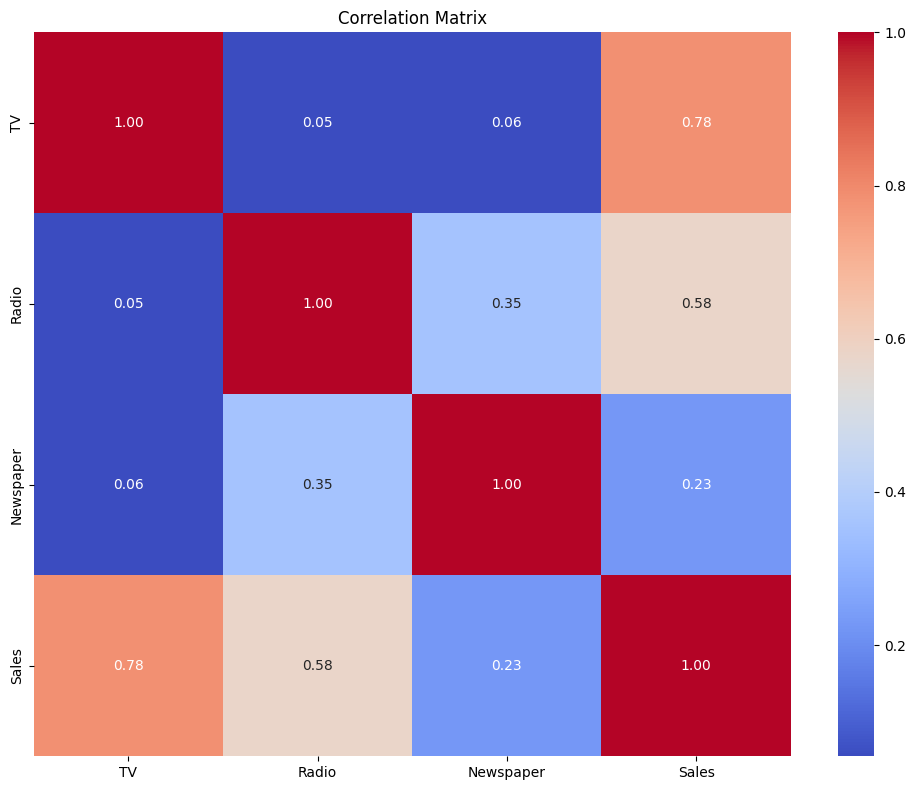

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

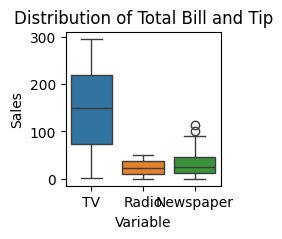

In [11]:
# Box plot
plt.figure(figsize=(2, 2))
sns.boxplot(data=df[['TV', 'Radio','Newspaper']])
plt.title('Distribution of Total Bill and Tip')
plt.ylabel('Sales')
plt.xlabel('Variable')
plt.show()

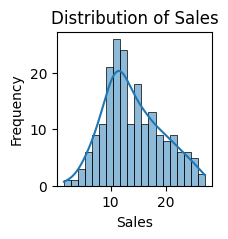

In [12]:
# Histogram
plt.figure(figsize=(2, 2))
sns.histplot(data=df, x='Sales', bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [13]:
import seaborn as sns
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

In [14]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

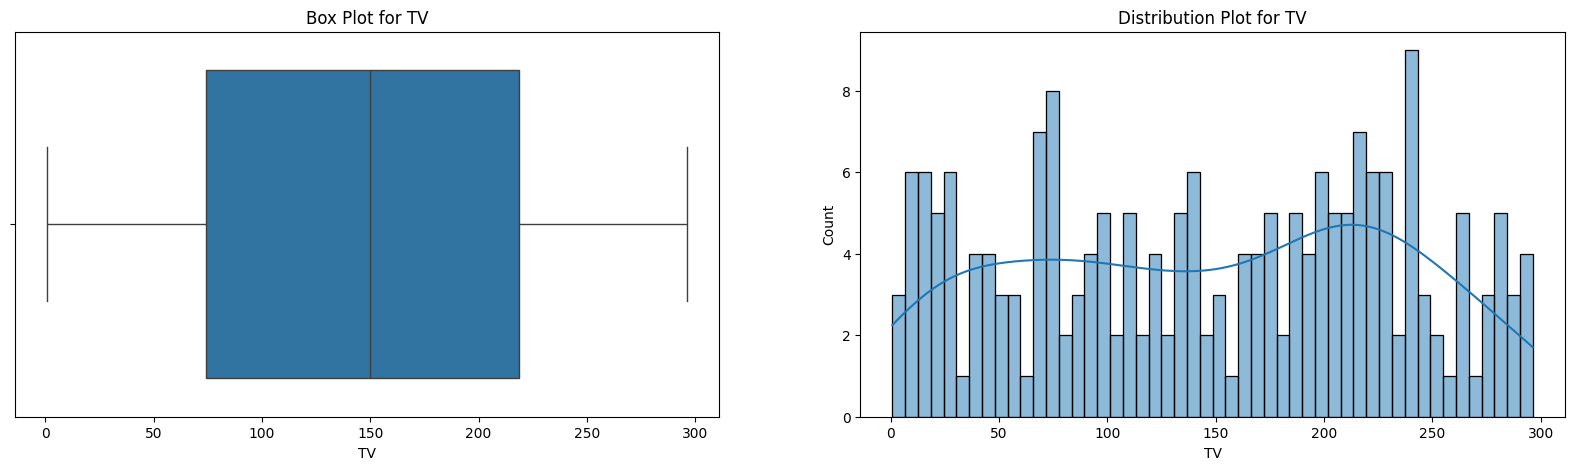

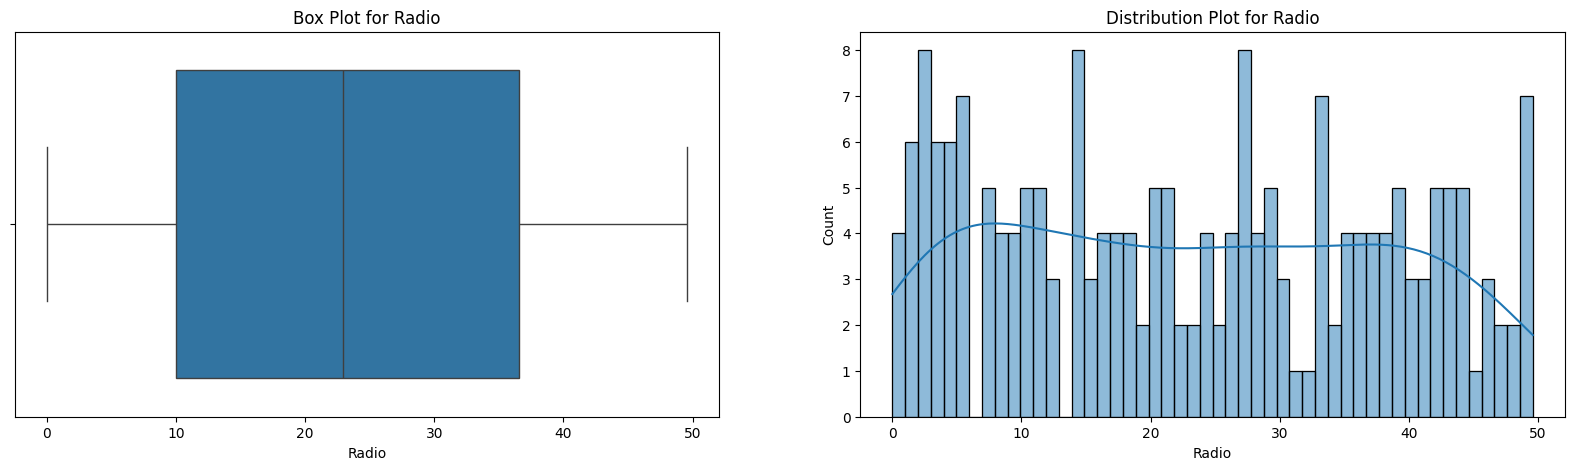

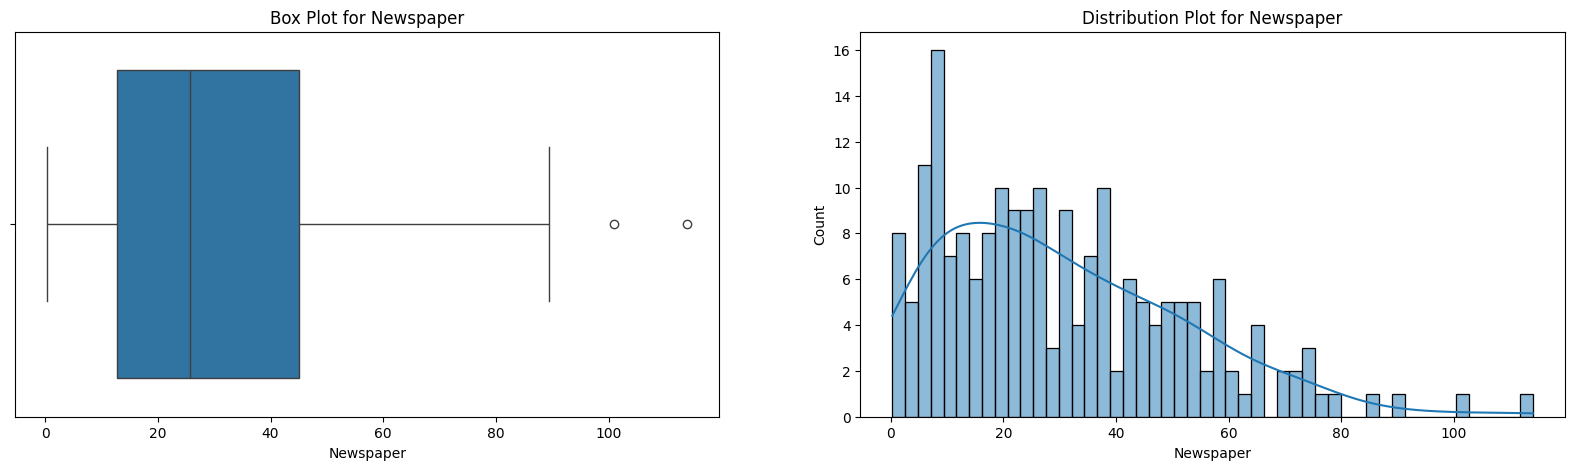

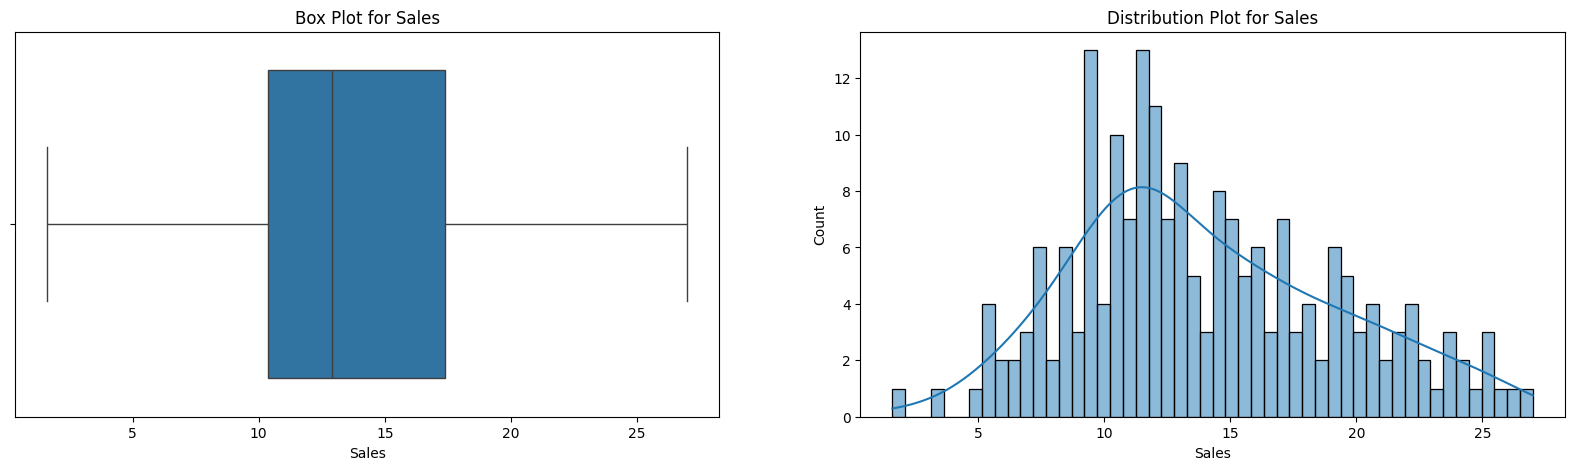

In [15]:
for i in ['TV', 'Radio', 'Newspaper', 'Sales']:
    plot(df, i)

In [16]:
###Handling outliers
# Box Plot
fig = px.box(df, y='Newspaper', title='Boxplot of Newspaper')
fig.show()

In [17]:
# IQR (Interquartile range)
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

#### skewness

In [18]:
df["Sales"].skew()

0.4075714250767127

### machine learning

In [20]:
# 2 separating independent and dependent
x=df.drop("Sales",axis=1)
y=df["Sales"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

In [23]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()}

decisiontree Regressor accuracy score:  1.0 0.928745265952601
RandomForestRegressor accuracy score:  0.9966718315998017 0.9768768087285126
GradientBoostingRegressor accuracy score:  0.9989345093264004 0.9850383265746827
AdaBoostRegressor accuracy score:  0.9747682712129502 0.9648510870583589
Extra Trees Regressor accuracy score:  0.999999868560155 0.9903811307466693


In [ ]:
### conclusion 
##extra trees regressor , gradient boosting ,adaboost are the most opt model 